In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

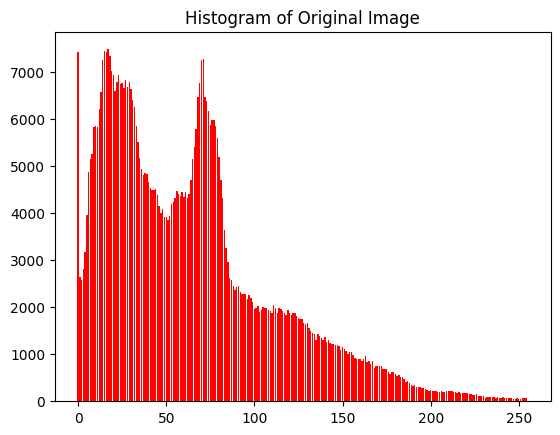

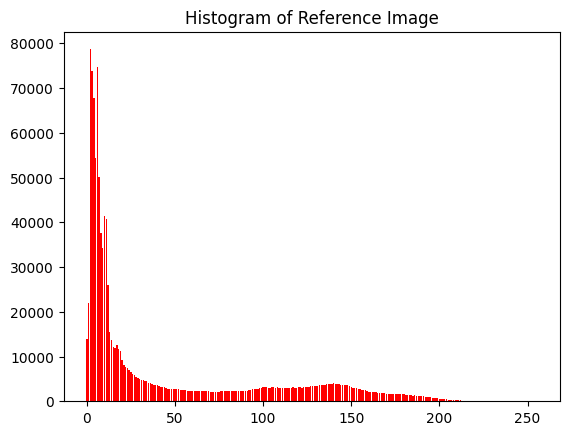

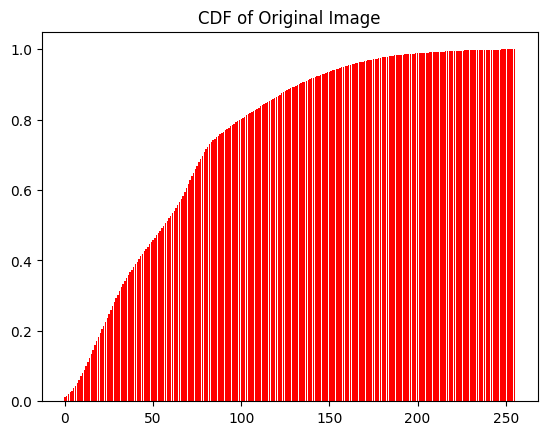

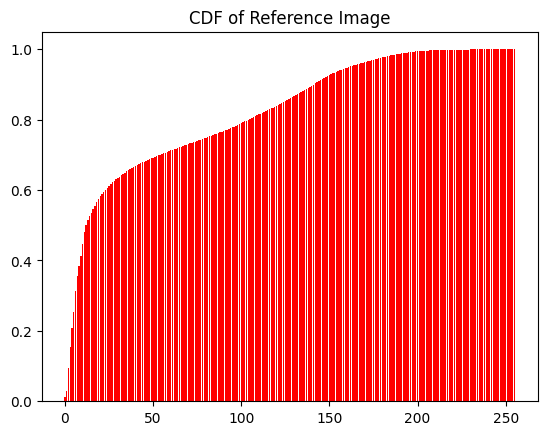

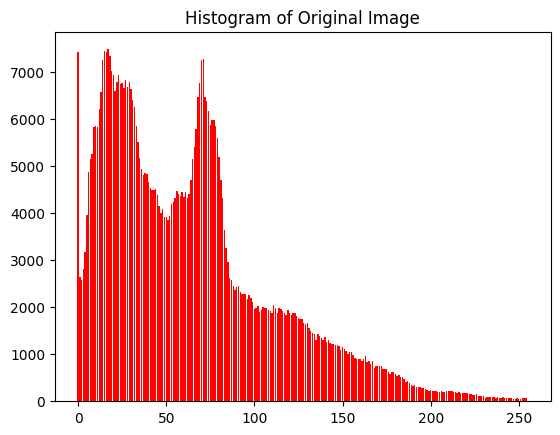

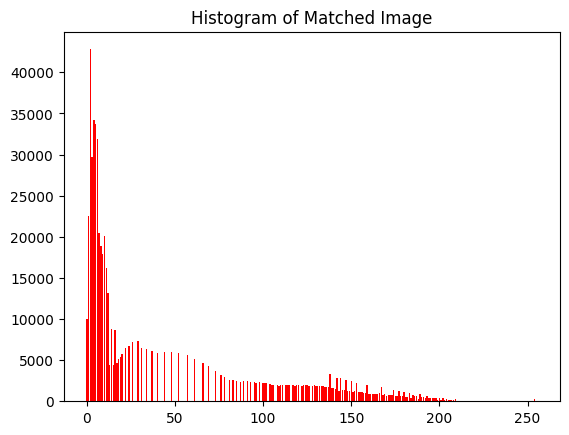

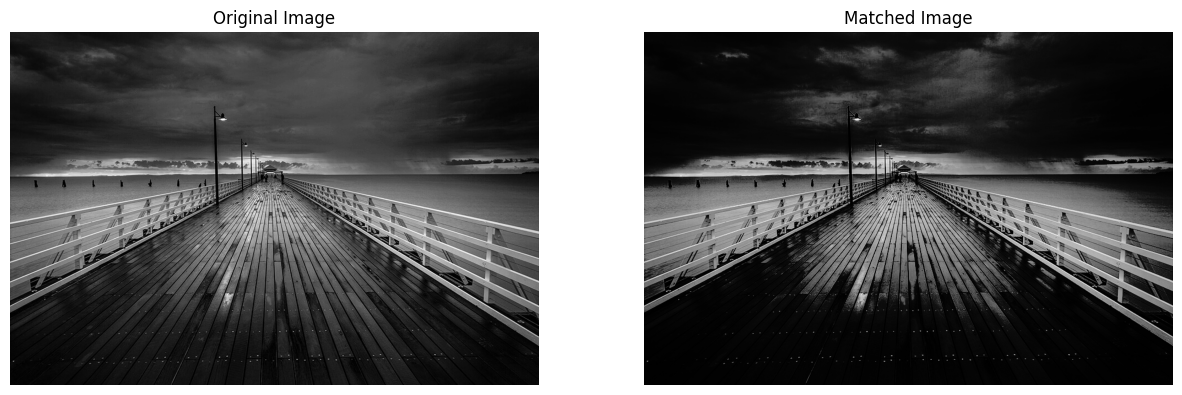

In [2]:
def histogram_matching(img,referenceImg):
    originalImage = img
    histogramOriginal = cv.calcHist([img], [0], None, [256], [0, 255])
    plt.bar(range(256), histogramOriginal.ravel(), color='red')
    plt.title("Histogram of Original Image")
    plt.show()

    histogramReference = cv.calcHist([referenceImg], [0], None, [256], [0, 255])
    plt.bar(range(256), histogramReference.ravel(), color='red')
    plt.title("Histogram of Reference Image")
    plt.show()

    cdfOriginal = histogramOriginal.cumsum()
    cdfOriginal = cdfOriginal/cdfOriginal.max()
    cdfReference = histogramReference.cumsum()
    cdfReference = cdfReference/cdfReference.max()

    plt.bar(range(256), cdfOriginal.ravel(), color='red')
    plt.title("CDF of Original Image")
    plt.show()
    plt.bar(range(256), cdfReference.ravel(), color='red')
    plt.title("CDF of Reference Image")
    plt.show()

    histogramOriginal = cv.calcHist([img], [0], None, [256], [0, 255])
    plt.bar(range(256), histogramOriginal.ravel(), color='red')
    plt.title("Histogram of Original Image")
    plt.show()

    matchImage = mappingFunction(originalImage,cdfOriginal,cdfReference)
    histogramMatchImage = cv.calcHist([matchImage], [0], None, [256], [0, 255])
    plt.bar(range(256), histogramMatchImage.ravel(), color='red')
    plt.title("Histogram of Matched Image")
    plt.show()

    return matchImage


def mappingFunction(img,cdfOriginal,cdfReference):
    lookup = np.zeros(256,dtype="uint8")
    for i in range(256):
        differencesFromAllCdfValues = np.abs(cdfReference-cdfOriginal[i])
        lookup[i] = np.argmin(differencesFromAllCdfValues)
    specified_img = cv.LUT(img, lookup) #mapping original image values according to lookup values
    return specified_img



img1 = cv.imread("originalImage.jpg",cv.IMREAD_GRAYSCALE)
img2 = cv.imread("referenceImage.jpeg",cv.IMREAD_GRAYSCALE)
matchImage = histogram_matching(img1,img2)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(matchImage, cmap="gray")
plt.title("Matched Image")
plt.axis("off")

plt.show()


